In [43]:
import keras
from keras.utils import to_categorical
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10

import matplotlib.pyplot as plt

In [36]:
(X_train_src, y_train), (X_test_src, y_test) = cifar10.load_data()


In [47]:
X_train = tf.cast(X_train_src, tf.float32) / 255.0
X_test = tf.cast(X_test_src, tf.float32) / 255.0

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

input_shape = X_train.shape[1:]

In [ ]:
cnn = keras.Sequential()

cnn.add(
    layer=layers.Input(shape=input_shape)
)

cnn.add(
    layer=layers.Conv2D(filters=32, kernel_size=3, activation='relu')
)


cnn.add(
    layer=layers.MaxPool2D(pool_size=2, strides=2)
)


cnn.add(
    layer=layers.Conv2D(filters=64, kernel_size=3, activation='relu')
)
cnn.add(
    layer=layers.MaxPool2D(pool_size=2, strides=2)
)



cnn.add(
    layer=layers.Flatten()
)
cnn.add(
    layer=layers.Dense(units=256, activation='relu')
)
cnn.add(
    layer=layers.Dropout(.5)
)

cnn.add(
    layer=layers.Dense(units=10, activation='softmax')
)

cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=.001), 
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

cnn.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
cnn.fit(X_train, y_train, batch_size=128, epochs=25, validation_split=.2)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - categorical_accuracy: 0.3770 - loss: 1.7084 - val_categorical_accuracy: 0.5059 - val_loss: 1.3988
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - categorical_accuracy: 0.5078 - loss: 1.3798 - val_categorical_accuracy: 0.5694 - val_loss: 1.2389
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - categorical_accuracy: 0.5642 - loss: 1.2277 - val_categorical_accuracy: 0.5678 - val_loss: 1.2268
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - categorical_accuracy: 0.6022 - loss: 1.1311 - val_categorical_accuracy: 0.6246 - val_loss: 1.0747
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - categorical_accuracy: 0.6324 - loss: 1.0533 - val_categorical_accuracy: 0.6488 - val_loss: 1.0138
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - categorical_accuracy: 0.6505 - loss: 0.9984 - val_categorical_accuracy: 0.6551 - val_loss: 0.9845
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - categorical_accuracy

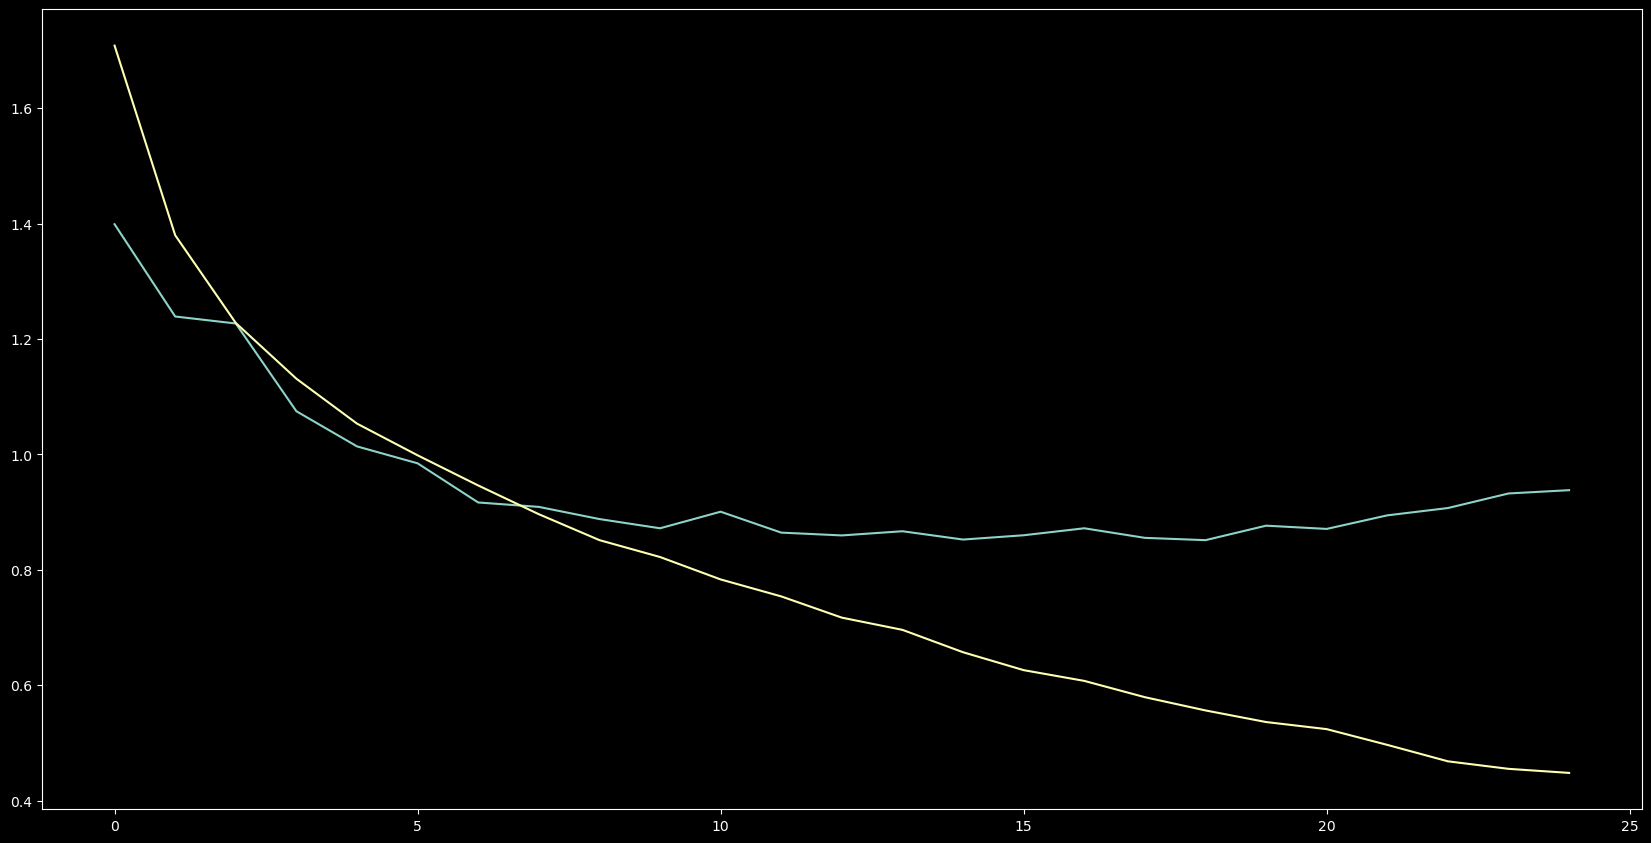

In [50]:
history = cnn.history


fig = plt.figure(figsize=(16, 8))

ax = fig.add_axes(rect=(0,0,1,1))

ax.plot(history.history['val_loss'])
ax.plot(history.history['loss'])

In [51]:
test_loss, test_metric = cnn.evaluate(X_test, y_test)

print(test_loss, test_metric)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - categorical_accuracy: 0.7121 - loss: 0.9497
0.949714183807373 0.7121000289916992
